In [39]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [3]:
ucl = pd.read_excel('UCL_playerstats_orig.xlsx')

#### 🔢 HAPI 1: Zgjedhja e Veçorive dhe Target-it

In [4]:
#1.Kjo osht kolona shka jemi duke parashikur te dhenat qe do te perdoret
target = "Value10^6"

In [5]:
#2. Zgjedhim kolonat që ndikojnë në vlerën e lojtarit
features = [ 'Age', 'Position', 'Total_attempts','Rating', 'Goals', 'Assists', 'Minutes_played']


#### 🔢 HAPI 2: Splitimi i Train dhe Test  Ndarja në input (X) dhe target (y)

In [6]:
X = ucl[features]
y = ucl[target]

In [7]:
y

,Age,Position,Total_attempts,Rating,Goals,Assists,Minutes_played
0,27,Defender,17,7.02,0,0,861
1,28,Midfielder,12,7.11,0,2,994
2,36,Forward,34,7.48,11,0,985
3,28,Forward,52,8.31,13,9,1225
4,33,Defender,4,7.31,1,0,840
...,...,...,...,...,...,...,...
205,22,Forward,10,7.15,2,0,460
206,35,Midfielder,9,7.06,1,1,388
207,27,Midfielder,2,7.41,0,0,673
208,26,Midfielder,10,7.43,0,0,666


#### 3️⃣ One-Hot Encoding për pozitat
##### Modelet e regresionit nuk kuptojnë tekste – duhet t’i shndërrojmë në numra binarë për secilën pozitë.

In [8]:
# Konvertojmë 'Position' në kolona numerike
# Convert categorical variable 'Position' into dummy variables
X = pd.get_dummies(X, columns=['Position'], drop_first=True)

In [9]:
X

,Age,Total_attempts,Rating,Goals,Assists,Minutes_played,Position_Forward,Position_Goalkeeper,Position_Midfielder
0,27,17,7.02,0,0,861,False,False,False
1,28,12,7.11,0,2,994,False,False,True
2,36,34,7.48,11,0,985,True,False,False
3,28,52,8.31,13,9,1225,True,False,False
4,33,4,7.31,1,0,840,False,False,False
...,...,...,...,...,...,...,...,...,...
205,22,10,7.15,2,0,460,True,False,False
206,35,9,7.06,1,1,388,False,False,True
207,27,2,7.41,0,0,673,False,False,True
208,26,10,7.43,0,0,666,False,False,True


#### 4️⃣ Normalizimi (Standardizimi) i të dhënave

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#### 5️⃣ Ndarja train/test
#####  Përdorim 70% të të dhënave për të trajnuar modelin, dhe 30% për ta testuar performancën.

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [36]:
X_test

array([[-0.85821841,  0.7381861 , -0.62727183,  0.07461372,  0.43019023,
         0.57296002,  1.51038075, -0.32444284, -0.6770032 ],
       [ 2.31956764, -1.1209805 , -1.03814857, -0.75006425, -0.89833843,
         1.17982052, -0.66208471,  3.082207  , -0.6770032 ],
       [-0.40424897,  0.38405913, -0.05204439,  0.48695271,  0.43019023,
        -0.00460377,  1.51038075, -0.32444284, -0.6770032 ],
       [-1.08520313, -1.03244875,  0.23556933, -0.75006425, -0.89833843,
        -0.05901195, -0.66208471, -0.32444284,  1.47709789],
       [ 0.04972046,  0.91524959,  0.7697091 ,  2.96098664, -0.89833843,
         0.24651092,  1.51038075, -0.32444284, -0.6770032 ],
       [-1.08520313, -0.14713133,  2.12560235,  0.48695271,  0.43019023,
        -1.10532316, -0.66208471, -0.32444284,  1.47709789],
       [-0.85821841,  1.18084482, -0.54509648, -0.33772527,  1.09445456,
         0.589701  ,  1.51038075, -0.32444284, -0.6770032 ],
       [-1.08520313,  0.64965436,  0.35883236,  0.07461372,  1

In [37]:
y_test

30      55.00
172      1.00
84      75.00
199     30.00
60     100.00
155     30.00
45      18.00
182     35.00
9        1.00
196      0.75
136     35.00
187     25.00
207     35.00
126      7.00
15     180.00
73      70.00
165     80.00
18      30.00
168     23.00
93      60.00
75      75.00
55      50.00
147     30.00
109     75.00
108     30.00
142     36.00
25      70.00
125     25.00
16       3.00
173      6.00
192     25.00
69      20.00
101     16.00
67      22.00
104     10.00
132     45.00
180     50.00
95       7.00
82      45.00
159     50.00
197     35.00
162      1.00
Name: Value10^6, dtype: float64

In [34]:
X_train.shape

(168, 9)

In [35]:
y_train.shape

(168,)

#### 6️⃣ Trajnimi i Linear Regression

In [ ]:
# Train the model

In [15]:
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


#### 7️⃣ Predikimi dhe Vlerësimi

In [18]:
preds = model.predict(X_test)

In [20]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, preds)
mse = mean_squared_error(y_test, preds)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, preds)

In [21]:
print("Rezultatet e Linear Regression:")
print("MAE :", round(mae, 2))
print("RMSE:", round(rmse, 2))
print("R²  :", round(r2, 2))

Rezultatet e Linear Regression:
MAE : 19.33
RMSE: 23.36
R²  : 0.5


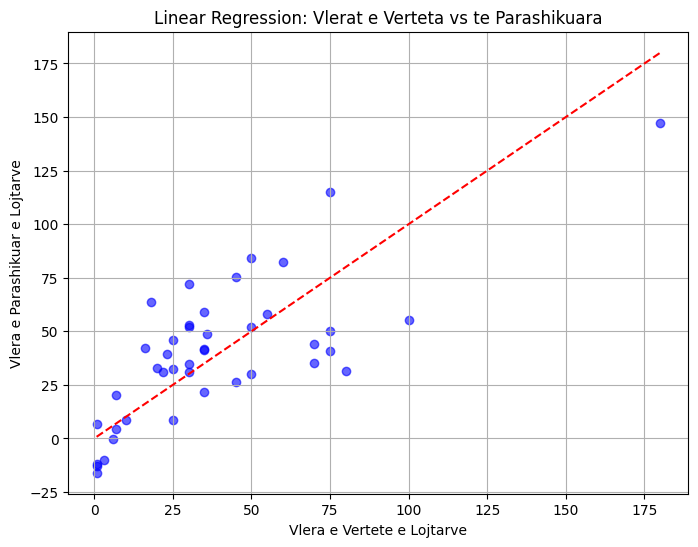

In [28]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, preds, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Linja perfekte
plt.xlabel("Vlera e Vertete e Lojtarve")
plt.ylabel("Vlera e Parashikuar e Lojtarve")
plt.title("Linear Regression: Vlerat e Verteta vs te Parashikuara")
plt.grid(True)
plt.show()